In [3]:
import pandas as pd
df_daily = pd.read_parquet("C:/Users/bisar/My fitbit dashboard project/Daily Data/daily_summary.parquet")

In [7]:
df_daily.tail()

,date,calories,distance,steps,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,total_active_minutes,active_sedentary_ratio,energy_movement_kpi
239,2025-12-29,1751.28,186662.0,1979.0,129.0,6.0,14.0,1291.0,149.0,0.115414,0.382552
240,2025-12-30,1766.06,312437.0,3270.0,164.0,1.0,6.0,1269.0,171.0,0.134752,0.465551
241,2025-12-31,1813.65,555257.0,5977.0,128.0,15.0,12.0,1285.0,155.0,0.120623,0.635464
242,2026-01-01,1708.99,152043.0,1585.0,110.0,0.0,0.0,1330.0,110.0,0.082707,0.352786
243,2026-01-02,1412.46,315298.0,3069.0,70.0,0.0,0.0,1155.0,70.0,0.060606,0.407422


**How does my activity change over time**

In [5]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       244 non-null    datetime64[ns]
 1   calories                   244 non-null    float64       
 2   distance                   244 non-null    float64       
 3   steps                      244 non-null    float64       
 4   lightly_active_minutes     244 non-null    float64       
 5   moderately_active_minutes  244 non-null    float64       
 6   very_active_minutes        244 non-null    float64       
 7   sedentary_minutes          244 non-null    float64       
 8   total_active_minutes       244 non-null    float64       
 9   active_sedentary_ratio     244 non-null    float64       
 10  energy_movement_kpi        244 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 21.1 KB


In [6]:
df_daily.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

**“How has my daily movement changed over time? X-axis: date, Y-axis: Steps”**

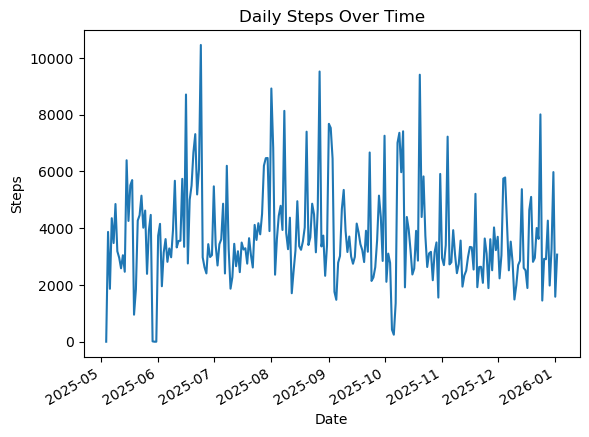

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_daily["date"], df_daily["steps"])
plt.xlabel("Date")
plt.ylabel("Steps")
plt.title("Daily Steps Over Time")
plt.gcf().autofmt_xdate()  # ← key line
plt.show()


**How does movement relate to calories burned? Do more steps actually mean more calories burned in my data?**

**Hypothesis:** As steps increase, calories burned also increase.

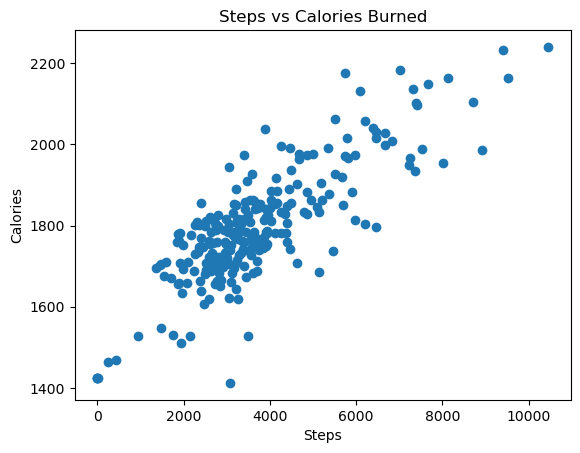

In [12]:
plt.figure()
plt.scatter(df_daily['steps'], df_daily['calories'])
plt.xlabel('Steps')
plt.ylabel('Calories')
plt.title('Steps vs Calories Burned')
plt.show()

In [13]:
df_daily['steps'].corr(df_daily['calories'])

np.float64(0.8236718194706455)

**Is calories driven more by steps or distance?**

In [15]:
df_daily['distance'].corr(df_daily['calories'])

np.float64(0.7953909982338141)

## **Insight: Calories burned aligns more with how often I move than how far each step is.**

**How does activity intensity affect sedentary behavior? 
Specifically: Does higher total_active_minutes reduce sedentary_minutes?**

In [17]:
df_daily['total_active_minutes'].corr(df_daily['sedentary_minutes'])

np.float64(-0.975477524384517)

**how today’s activity affects tomorrow’s activity**

In [18]:
# create a new column for next day's total_active_minutes
df_daily["total_active_next_day"] = df_daily["total_active_minutes"].shift(-1)

# drop the last row which will have NaN
df_lagged = df_daily.dropna(subset=["total_active_next_day"])

# compute correlation between today and next day
lag_corr = df_lagged["total_active_minutes"].corr(df_lagged["total_active_next_day"])
lag_corr


np.float64(0.3601499818453926)

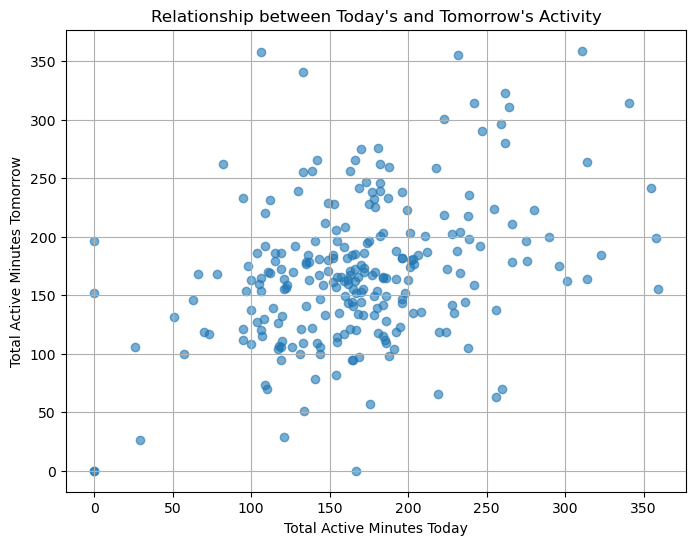

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(df_daily['total_active_minutes'], df_daily['total_active_next_day'], alpha=0.6)
plt.xlabel("Total Active Minutes Today")
plt.ylabel("Total Active Minutes Tomorrow")
plt.title("Relationship between Today's and Tomorrow's Activity")
plt.grid(True)
plt.show()

In [20]:
df_lagged.head()

,date,calories,distance,steps,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,total_active_minutes,active_sedentary_ratio,energy_movement_kpi,total_active_next_day
0,2025-05-04,1425.60,0.0,0.0,0.0,0.0,0.0,1440.0,0.0,0.000000,0.212161,152.0
1,2025-05-05,1813.57,398600.0,3869.0,138.0,2.0,12.0,1288.0,152.0,0.118012,0.518875,161.0
2,2025-05-06,1778.81,175551.0,1864.0,161.0,0.0,0.0,1279.0,161.0,0.125880,0.379481,182.0
3,2025-05-07,1828.60,401850.0,4352.0,169.0,5.0,8.0,1258.0,182.0,0.144674,0.537533,246.0
4,2025-05-08,1909.28,319459.0,3477.0,239.0,5.0,2.0,1194.0,246.0,0.206030,0.495677,192.0
